# Análise da folha de pagamento da Unitins

In [1]:
import pandas as pd
import numpy as np


In [93]:
df = pd.DataFrame()
if 
for ano in range(2008, 2022:
    for mes in range(1, 13:
        url = "https://www.unitins.br/portaltransparencia/folha-de-pagamento?TipoAno={}&tipoMes={:02}&TipoPesquisa=Nome&busca=".format(ano, mes)
        try:
            salario = pd.read_html(url)
            df_salario = pd.DataFrame(salario[0])
            df_salario['referencia'] = "{}_{}".format(ano, mes)

            df = df.append(df_salario, ignore_index=True)
        except:
            pass
df['TOTAL VENCIMENTO*'] = [x.strip("R$ ") for x in df['TOTAL VENCIMENTO*']]
df['DESCONTO IRRF'] = [x.strip("R$ ") for x in df['DESCONTO IRRF']]
df['DESCONTO PREVIDÊNCIA'] = [x.strip("R$ ") for x in df['DESCONTO PREVIDÊNCIA']]
df['DESCONTOS DIVERSOS'] = [x.strip("R$ ") for x in df['DESCONTOS DIVERSOS']]
df['SALÁRIO LÍQUIDO'] = [x.strip("R$ ") for x in df['SALÁRIO LÍQUIDO']]

df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace('.', "")
df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace(',', ".").astype(float)

df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace('.', "")
df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace(',', ".").astype(float)

df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace('.', "")
df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace(',', ".").astype(float)

df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace('.', "")
df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace(',', ".").astype(float)

df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace('.', "")
df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace(',', ".").astype(float)


df.to_csv("folha.csv", sep=";", index=False)

ImportError: html5lib not found, please install it

,Unnamed: 0,MATRÍCULA,NOME COMPLETO,FUNÇÃO,LOTAÇÃO (ATUAL),VÍNCULO,TOTAL VENCIMENTO*,DESCONTO IRRF,DESCONTO PREVIDÊNCIA,DESCONTOS DIVERSOS,SALÁRIO LÍQUIDO,REFERÊNCIA,referencia
0,0,830501,CARLOS ROBERTO A.GOMES,A.ES.GAB.GOV.II-DAS3,DIRETORIA DE TV E RADIO,COMISSIONADO,"R$ 16.213,33","R$ 1.536,34","R$ 751,99","R$ 0,00","R$ 13.925,00",Mês 1 de 2021,2021_1
1,1,830504,SEBASTIAO VIEIRA DE MELO,A.ESP.GAB.GOV.I-DAS2,DIRETORIA DE TV E RADIO,COMISSIONADO,"R$ 21.780,97","R$ 1.673,84","R$ 751,99","R$ 0,00","R$ 19.355,14",Mês 1 de 2021,2021_1
2,2,810054,YZAAC GONCALVES DA SILVA,ADM.BANCO DADOS/ C-3,COORDENADORIA DE DESENV.E INOV.TECNOLOGI,EFETIVO,"R$ 8.442,62","R$ 1.162,45","R$ 864,63","R$ 1.005,84","R$ 5.409,70",Mês 1 de 2021,2021_1
3,3,810092,CARLOS DIEGO CARVALHO CHAVES,ADM.BC.DADOS / A-1,COORDENADORIA DE DESENV.E INOV.TECNOLOGI,EFETIVO,"R$ 3.785,92","R$ 105,14","R$ 530,03","R$ 1.107,07","R$ 2.043,68",Mês 1 de 2021,2021_1
4,4,900391,MARCOS CORTIZO VIDAL,ADMINISTRAD/01-III-J,COORD DO NUCLEO TOC. DE ARQUEOLOGIA-NUTA,EFETIVO/Disp,"R$ 11.943,02","R$ 1.342,09","R$ 1.254,02","R$ 771,43","R$ 8.575,48",Mês 1 de 2021,2021_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1121,810038,SEBASTIAO SILVA SOUZA,VIGILANTE / B-1,COORD DO NUCLEO DE ZOOLOGIA E TAXIDERMIA,EFETIVO,"R$ 1.115,48","R$ 0,00","R$ 148,78","R$ 0,00","R$ 966,70",Mês 2 de 2021,2021_2
1122,1122,810051,ERASMO ROSA DA SILVA,VIGILANTE / C-2,COORD DO NUCLEO TOC. DE ARQUEOLOGIA-NUTA,EFETIVO,"R$ 1.593,31","R$ 0,00","R$ 190,02","R$ 0,00","R$ 1.403,29",Mês 2 de 2021,2021_2
1123,1123,810077,ADMILSON QUINTINO DA SILVA,VIGILANTE / C-3,DIRETORIA DO CAMPUS PALMAS,EFETIVO,"R$ 1.941,53","R$ 0,00","R$ 225,84","R$ 725,64","R$ 990,05",Mês 2 de 2021,2021_2
1124,1124,810040,ANTONIO DA SILVA SOUSA,VIGILANTE / C-3,COORDENADORIA PATRIMONIO E ALMOXARIFADO,EFETIVO,"R$ 2.400,99","R$ 5,71","R$ 231,14","R$ 0,00","R$ 2.164,14",Mês 2 de 2021,2021_2


## Número de servidores na Unitins

In [52]:
# df.head()

print("Total de servidores: ", len(df))
print("Total de efetivos: ", len(df[df['VÍNCULO'] == 'EFETIVO']))
print("Total de comissionados: ", len(df[df['VÍNCULO'] == 'COMISSIONADO']))
print("Total de contratados: ", len(df[df['VÍNCULO'] == 'CONTRATADO']))
print("Total de a disposição: ", len(df[df['VÍNCULO'] == 'EFETIVO/Disp'] ))


Total de servidores:  405
Total de efetivos:  67
Total de comissionados:  28
Total de contratados:  310
Total de a disposição:  0


In [53]:
profs = ['PROF. ADJUNTO I', 'PROF. DOUTOR I /2893',
       'PROF. MESTRE I /2893', 'PROF.UNIVERSITARIO 2',
       'PROF.UNIVERSITARIO 3', 'PROF.UNIVERSITARIO I', 'QS PU1PROF ESP. 4',
       'QS PU1PROF. DOUTOR4', 'QS PU1PROF. MESTRE4']

filtro_prof_efetivos = (df['FUNÇÃO'].isin(profs)) & (df['VÍNCULO'] == 'EFETIVO')

# df[filtro_prof_efetivos]

In [54]:
pyplot
matplotlib

## Descrição do campo salário líquido: média, menor, maior e moda.

Média:  1812.4854567901236
Menor:  0.0
Maior:  9756.32
Moda:  0.0


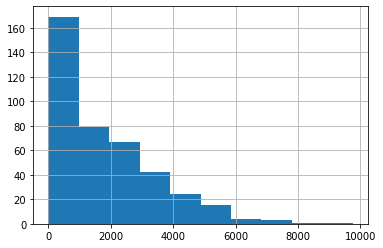

In [56]:
df['SALÁRIO LÍQUIDO'].hist()
print("Menor: ", np.min(df['SALÁRIO LÍQUIDO']))
print("Maior: ", np.max(df['SALÁRIO LÍQUIDO']))
print("Moda: ", df['SALÁRIO LÍQUIDO'].mode()[0])

## Descrição do campo salário bruto: média, menor, maior e moda.

In [57]:
df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace('.', "")
df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace(',', ".").astype(float)

Média:  2743.608395061728
Menor:  82.13
Maior:  16166.67
Moda:  720.0


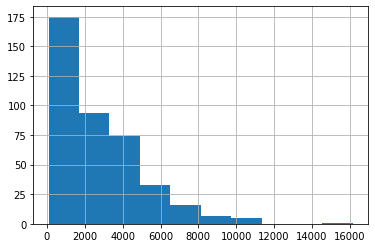

In [58]:
df['TOTAL VENCIMENTO*'].hist()

print("Média: ", np.mean(df['TOTAL VENCIMENTO*']))
print("Menor: ", np.min(df['TOTAL VENCIMENTO*']))
print("Maior: ", np.max(df['TOTAL VENCIMENTO*']))
print("Moda: ", df['TOTAL VENCIMENTO*'].mode()[0])